In [5]:
iter = 0
iter_CNN = 0
iter_CNN_CIFAR100 = 0
iter_CNN_CIFAR10_bin = 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist, cifar10, cifar100, mnist
from keras import Sequential
from keras.models import *
from keras.layers import *
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Fashion MNIST - Fully Connected

In [2]:
# Load datasets and use k-fold

# Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize data
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0          


### Inspección del dataset

📝 Ejercicio: 

Cambie el valor de **N** para obervar los distintos elementos del dataset

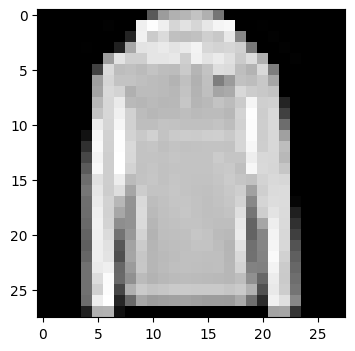

In [3]:
N = 24

# Tamaño de la imagen a mostrar
plt.figure(figsize=(4,4))

plt.imshow(x_train[N], cmap='gray')

### Arquitectura de la NN

In [ ]:
# MLP architecture
w = 28
h = 28
n_classes = 10

model = Sequential([

    Flatten(input_shape=(w, h)),
    Dense(192, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')

])

# training params
lr = 0.01
op = SGD(lr)

model.compile(loss='sparse_categorical_crossentropy', optimizer=op, metrics=['accuracy'])

model.summary()

c:\Users\lmendoza\OneDrive\FI-UNMdP\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 192)            │       150,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,114 (855.91 KB)

 Trainable params: 219,114 (855.91 KB)

 Non-trainable params: 0 (0.00 B)

### Training and eval

In [8]:
iter += 1

# training stage
history = model.fit(x_train_norm, y_train, epochs= 16, batch_size = 50, validation_split=0.2)

# evaluation stage
test_loss, test_acc = model.evaluate(x_test_norm, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

model.save('../models/mnistModel_FC_iter-' + str(iter) + '.h5')

Epoch 1/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1878 - loss: 2.1137 - val_accuracy: 0.6511 - val_loss: 1.1246
Epoch 2/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5862 - loss: 1.1091 - val_accuracy: 0.7067 - val_loss: 0.7125
Epoch 3/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6899 - loss: 0.8139 - val_accuracy: 0.7721 - val_loss: 0.6176
Epoch 4/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7359 - loss: 0.7127 - val_accuracy: 0.7925 - val_loss: 0.5549
Epoch 5/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7739 - loss: 0.6362 - val_accuracy: 0.8189 - val_loss: 0.5088
Epoch 6/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7909 - loss: 0.5814 - val_accuracy: 0.8303 - val_loss: 0.4706
Epoch 7/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8054 - loss: 0.5525 - val_accuracy: 0.8262 - val_loss: 0.4854
Epoch 8/16
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8155 - loss: 0.5160 - val_accuracy: 0.


Test accuracy: 0.8497


In [9]:
model.save('../models/mnistModel_FC_iter-' + str(iter) + '.keras')

### Metrics

#### Accuracy and loss functions

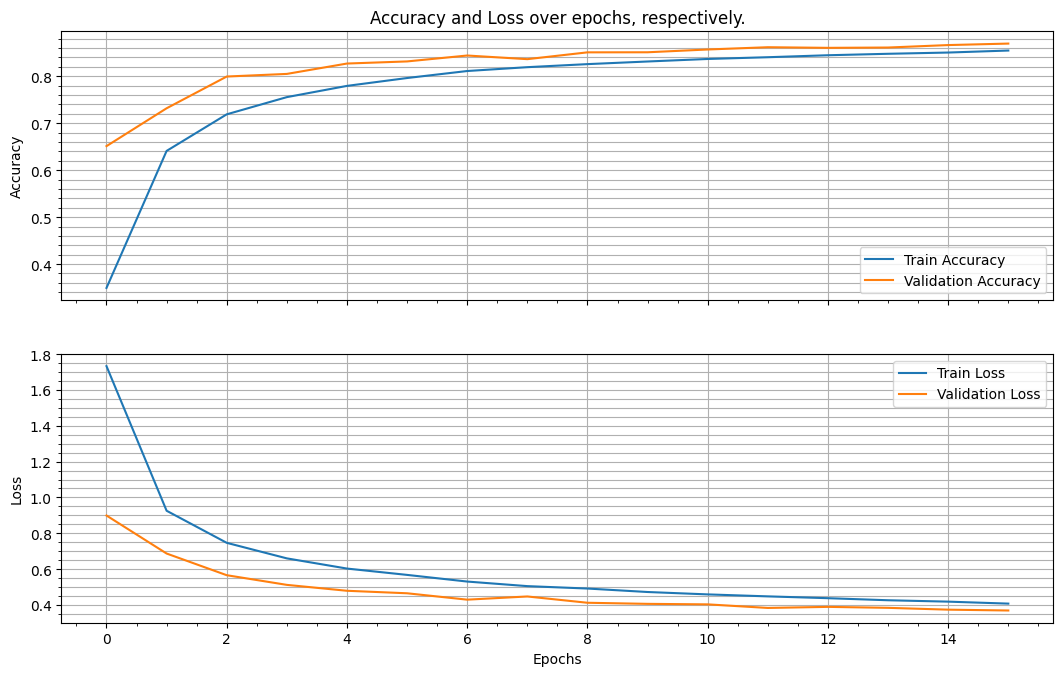

In [43]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/acc_n_loss_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

#### Confusion Matrix

313/313 [==============================] - 1s 2ms/step


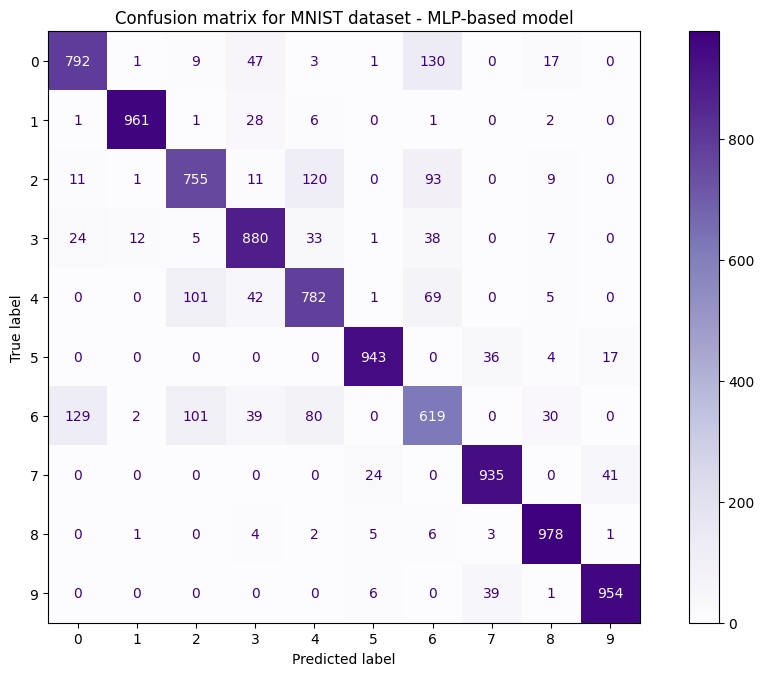

In [44]:
y_pred_probs = model.predict(x_test_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Purples')
plt.title('Confusion matrix for MNIST dataset - MLP-based model')

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/confusion_matrix_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

#### ROC Curve

313/313 [==============================] - 1s 2ms/step


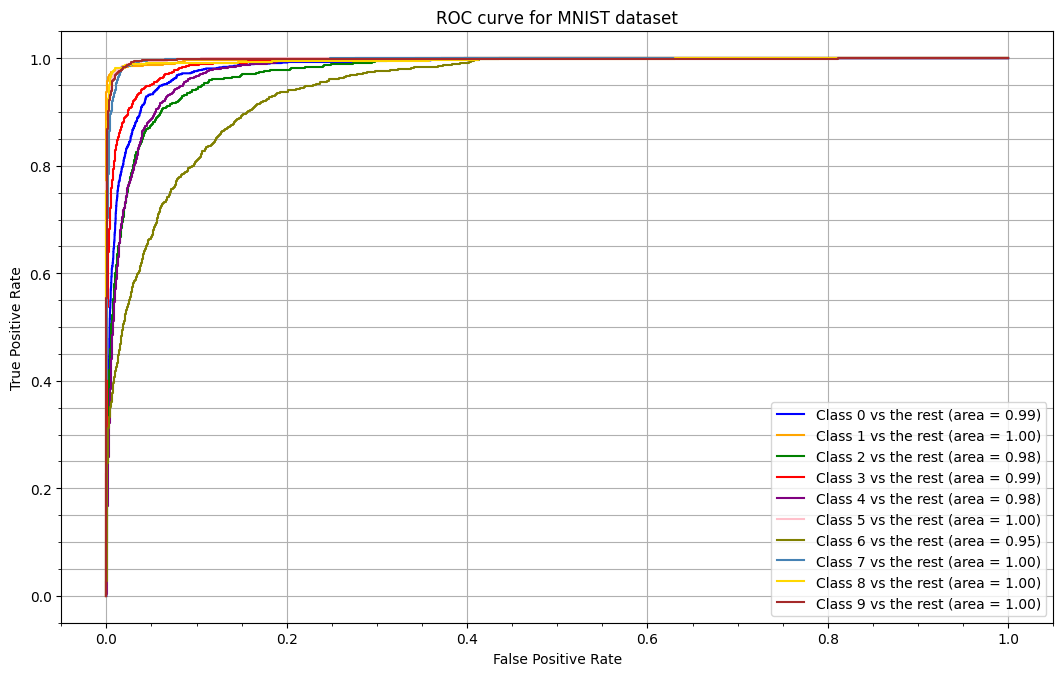

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.colors as mcolors

y_pred = model.predict(x_test)

y_pred_labels = np.argmax(y_pred, axis=1)


# compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
  fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs[:,i], pos_label=i) 
  roc_auc[i] = auc(fpr[i], tpr[i])

## roc_auc_score require the y_test and y_pred array be in catecorical mode
ycat_test = keras.utils.to_categorical(y_test, 10)
ycat_test_pred = keras.utils.to_categorical(y_pred, 10)

# print(roc_auc_score(ycat_test, ycat_test_pred, multi_class='ovr', average='weighted'))

# Plot with for-loop
color = ['blue','orange', 'green', 'red', 'purple', 'pink', 'olive', 'steelblue', 'gold', 'brown' ]
plt.figure()
for g in range (10):
  plt.plot(fpr[g], tpr[g], color=color[g], label='Class %d vs the rest (area = %.2f)' % (g, roc_auc[g]))

# Plot by element
# plt.plot(fpr[0], tpr[0], color='blue', label='Class 0 vs the rest (area = %.2f)' % roc_auc[0])
# plt.plot(fpr[1], tpr[1], color='red', label='Class 1 vs the rest (area = %.2f)' % roc_auc[1])
# plt.plot(fpr[2], tpr[2], color='green', label='Class 2 vs the rest (area = %.2f)' % roc_auc[2])
# plt.plot(fpr[3], tpr[3], color='orange', label='Class 3 vs the rest (area = %.2f)' % roc_auc[3])

plt.title('ROC curve for MNIST dataset')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax = plt.gca()
ax.minorticks_on()
ax.grid(visible=True, which='both', axis='y')
ax.grid(visible=True, which='Major', axis='x')


fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/ROC_iter-" + str(iter) + ".png", bbox_inches='tight')

plt.show()

####  📝 Ejercicio: 

Varíe el valor de batch, epoch, y learning rate. Obtenga las gráficas correspondientes. Qué conclusiones puede obtener al variar estos parámetros?

---
Iter 1->2 = Reducir epochs de 32 a 16 y aumentar learning rate x10:
- casi mismo desempeño, un poco mas de OF.

Iter 2->3 = Agregar dropout del 30% luego de la capa de 256 neuronas para evitar overfitting.
- reduce overfitting.

Iter 3->4 = Cambiar optim a adam.
- peor desempeño, quizas sea necesario reducir el learning rate.

Iter 4->5 = Cambiar optim a SGD nuevamente, aumentar profundidad de la red para ayudar con la clase "#6"

## Uso de One-Hot Encoding


El One-Hot Encoding es una técnica para convertir etiquetas categóricas en un formato numérico que las redes neuronales pueden procesar.

Por ejemplo, para MNIST, tenemos las clases 0, 1, 2, 3 ... hasta 9. En one-hot encoding estas se representan de la siguiente manera: 

0 -> [1, 0, 0, 0, ...]

1 -> [0, 1, 0, 0, ...]

2 -> [0, 0, 1, 0, ...]

3 -> [0, 0, 0, 1, ...]

y asi sucesivamente con todas las categorias presentes en el dataset. 


In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes = n_classes)
y_test = to_categorical(y_test, num_classes = n_classes)

# Uso de categorical_crossentropy loss 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# vuelvo a entrenar con one-hot encode
history = model.fit(x_train_norm, y_train, epochs= 16, validation_split=0.2)

# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# 📝 Ejercicios:

- Computar las métricas para CIFAR-10.

- Para MNIST, reemplazar la capa _Flatten_ en la definicion del modelo por _Dense_. Para este paso, la imagen se debe convertir en un vector de 1D. 

- Repetir el procedimiento anterior para fashion MNIST y CIFAR-100 datasets. 

- Obtener las métricas pertinentes para verificar el rendimiento del modelo.

- Para CIFAR-10 seleccione 2 clases e implemente un clasificador binario.


## CIFAR-10 para CNN

Vamos a repetir el procedimiento anterior pero haciendo uso de CIFAR-10 dataset. En este caso, vamos a emplear una arquitectura basada en 2D-CNN.

In [3]:
from keras.datasets import fashion_mnist, cifar10, cifar100, mnist

# Carga del dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizacion del dataset
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step


(50000, 32, 32, 3)

In [4]:
# defino arquitectura de NN
els = 64*4*4

model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)), 
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    # added for reshape exercise
    Reshape((1,els), input_shape=(None,4,4,64)),
    Dense(els, activation='relu'),
    # added for reshape exercise

    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    
    Dense(10, activation='softmax')
])

c:\Users\lmendoza\OneDrive\FI-UNMdP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\lmendoza\OneDrive\FI-UNMdP\.venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# defino iterador para guardar plots
iter_CNN = 3

# Compilar el modelo
op = Adam(0.001)
model.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',   # Usar 'sparse_categorical_crossentropy' porque las etiquetas NO están one-hot encoded
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train_norm, y_train, epochs=32,  validation_split=0.2, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Guardo el modelo (.h5 esta obsoleto, ahora se usa .keras)
model.save('../models/cifar10Model_CNN_iter-' + str(iter_CNN) + '.h5')

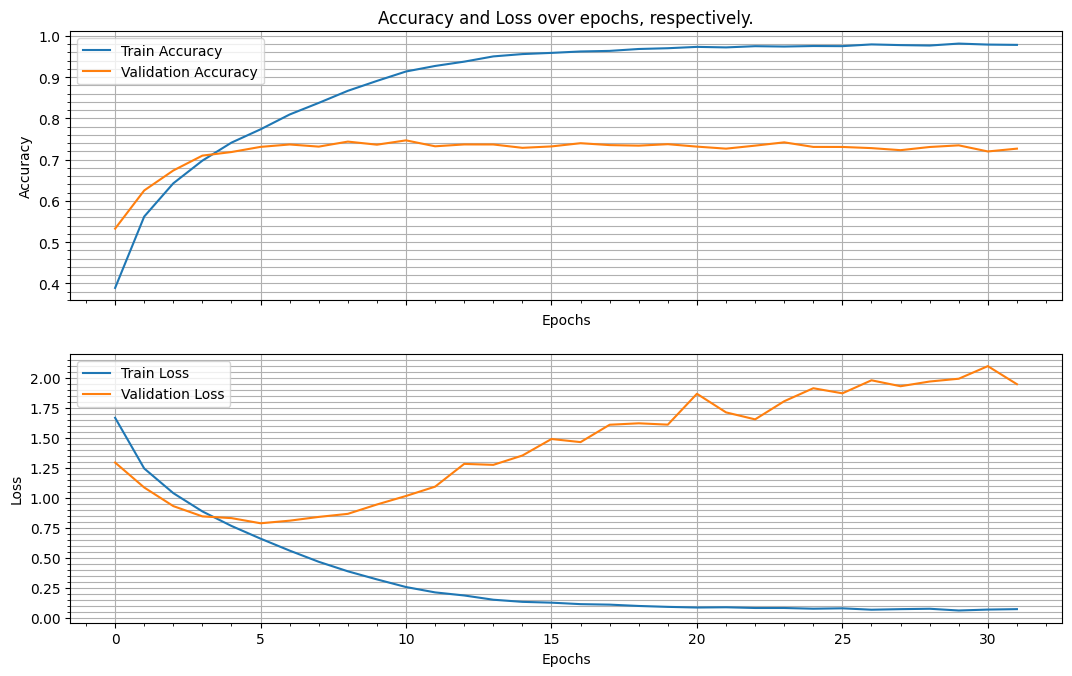

In [29]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/CNN_acc_n_loss_iter-" + str(iter_CNN) + ".png", bbox_inches='tight')

plt.show()

## Fashion MNIST con CNN

In [7]:
iter_CNN_fashionMNIST = 0
# Load datasets and use k-fold

# Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize data
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [8]:
model__CNN_fashionMNIST = Sequential([

    Conv2D(28, (3,3), activation='relu', padding='same', input_shape=(28,28,1)), 
    MaxPooling2D((2,2)),
    
    Dropout(0.2),
    Conv2D(56, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Dropout(0.2),
    Conv2D(56, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    
    Dense(10, activation='softmax')
])

model__CNN_fashionMNIST.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 56)     │        14,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 56)       │        28,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 504)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        64,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,658 (424.45 KB)

 Trainable params: 108,658 (424.45 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# defino iterador para guardar plots
iter_CNN_fashionMNIST += 1

# Compilar el modelo
op = Adam(0.001)
model__CNN_fashionMNIST.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',   # Usar 'sparse_categorical_crossentropy' porque las etiquetas NO están one-hot encoded
              metrics=['accuracy'])

# Entrenar el modelo
history = model__CNN_fashionMNIST.fit(x_train_norm, y_train, epochs=32,  validation_split=0.2, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model__CNN_fashionMNIST.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

model__CNN_fashionMNIST.save('../models/fashionMNISTModel_CNN_iter-' + str(iter_CNN_fashionMNIST) + '.h5')

Epoch 1/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.6013 - loss: 1.0655 - val_accuracy: 0.8308 - val_loss: 0.4545
Epoch 2/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8170 - loss: 0.5017 - val_accuracy: 0.8625 - val_loss: 0.3553
Epoch 3/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8499 - loss: 0.4171 - val_accuracy: 0.8796 - val_loss: 0.3215
Epoch 4/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8626 - loss: 0.3745 - val_accuracy: 0.8896 - val_loss: 0.3003
Epoch 5/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8765 - loss: 0.3413 - val_accuracy: 0.8968 - val_loss: 0.2769
Epoch 6/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8846 - loss: 0.3242 - val_accuracy: 0.9028 - val_loss: 0.2644
Epoch 7/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8893 - loss: 0.3110 - val_accuracy: 0.9026 - val_loss: 0.2632
Epoch 8/32
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8946 - loss: 0.2919 - 


Test Accuracy: 0.8840


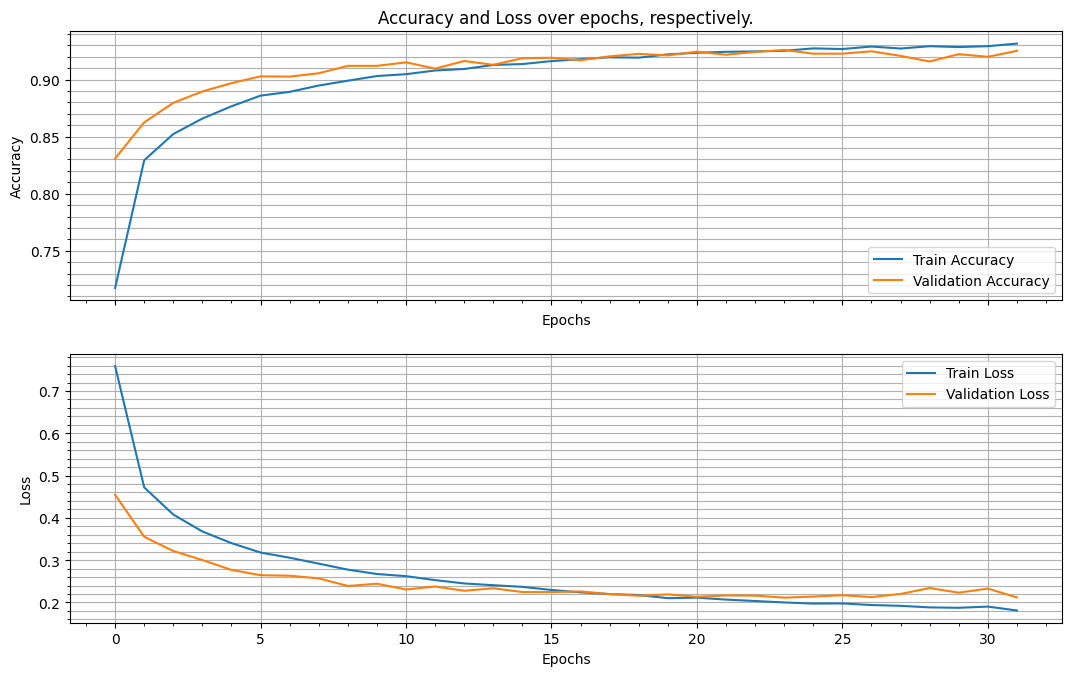

In [10]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/CNN_fashionMNIST_acc_n_loss_iter-" + str(iter_CNN_fashionMNIST) + ".png", bbox_inches='tight')

plt.show()

## CIFAR 100

In [17]:
from keras.datasets import cifar100

# Load datasets and use k-fold
# Fashion MNIST
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# normalize data
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 66s 0us/step


In [18]:
# defino arquitectura
model__CNN_CIFAR100 = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)), 
    MaxPooling2D((2,2)),
    
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation='relu'),

    Dropout(0.2),
    Dense(128, activation='relu'),

    Dropout(0.5),
    Dense(100, activation='softmax')
])

model__CNN_CIFAR100.summary()

c:\Users\lmendoza\OneDrive\FI-UNMdP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 659,684 (2.52 MB)

 Trainable params: 659,684 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# aumento iterador cada vez que reentreno
iter_CNN_CIFAR100 += 1

# Compilar el modelo
op = Adam(0.001)
model__CNN_CIFAR100.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',   # Usar 'sparse_categorical_crossentropy' porque las etiquetas NO están one-hot encoded
              metrics=['accuracy'])

# Entrenar el modelo
history = model__CNN_CIFAR100.fit(x_train_norm, y_train, epochs=32,  validation_split=0.2, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model__CNN_CIFAR100.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

model__CNN_CIFAR100.save('../models/CIFAR100_Model_CNN_iter-' + str(iter_CNN_CIFAR100) + '.h5')

Epoch 1/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.0213 - loss: 4.4808 - val_accuracy: 0.0844 - val_loss: 4.0019
Epoch 2/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.0908 - loss: 3.8818 - val_accuracy: 0.1670 - val_loss: 3.5002
Epoch 3/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.1519 - loss: 3.5480 - val_accuracy: 0.2140 - val_loss: 3.2588
Epoch 4/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.1906 - loss: 3.3431 - val_accuracy: 0.2468 - val_loss: 3.0786
Epoch 5/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.2179 - loss: 3.1769 - val_accuracy: 0.2677 - val_loss: 2.9960
Epoch 6/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.2436 - loss: 3.0557 - val_accuracy: 0.2919 - val_loss: 2.8475
Epoch 7/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.2670 - loss: 2.9313 - val_accuracy: 0.3062 - val_loss: 2.7708
Epoch 8/32
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.2857 - loss: 2.8428 - 

### Metrics

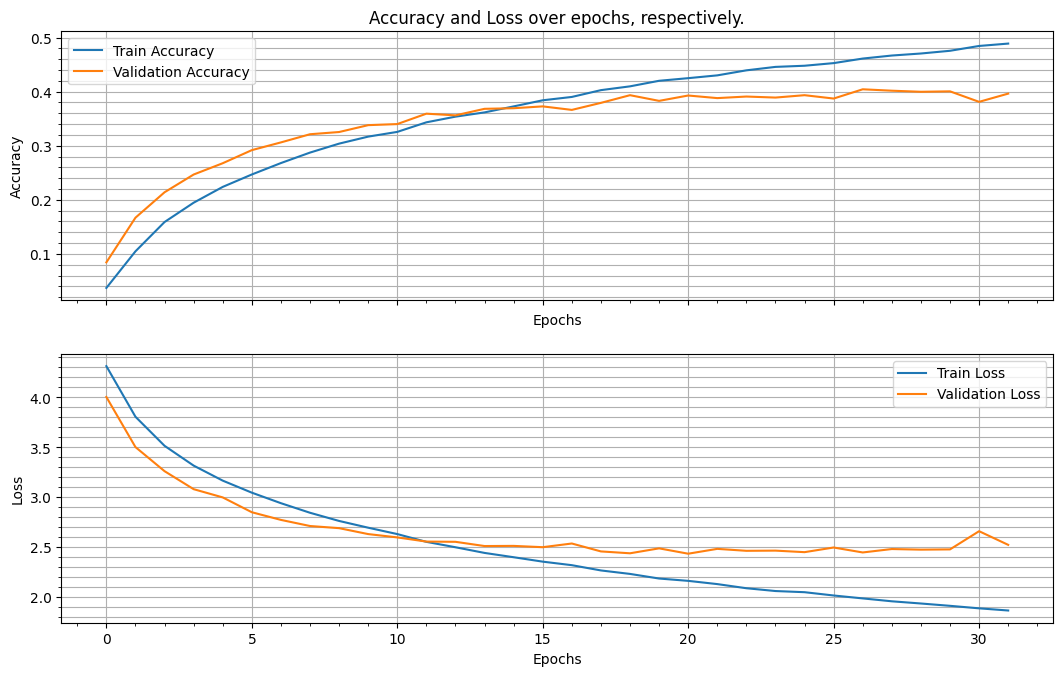

In [20]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/CNN_CIFAR100_acc_n_loss_iter-" + str(iter_CNN_CIFAR100) + ".png", bbox_inches='tight')

plt.show()

## CIFAR 10: 2 clases

In [23]:
from keras.datasets import cifar10

# Load datasets and use k-fold
# Fashion MNIST
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

index = np.where((y_train == 9) | (y_train == 3))
(x_train_bin, y_train_bin) = (x_train[index[0]], y_train[index[0]])

index = np.where((y_test == 9) | (y_test == 3))
(x_test_bin, y_test_bin) = (x_test[index[0]], y_test[index[0]])

In [25]:
# defino arquitectura de NN
model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)), 
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # Reduce overfitting
    
    Dense(10, activation='softmax')
])

c:\Users\lmendoza\OneDrive\FI-UNMdP\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# defino iterador para guardar plots
iter_CNN_CIFAR10_bin += 1

# Compilar el modelo
op = Adam(0.001)
model.compile(optimizer=op,
              loss='sparse_categorical_crossentropy',   # Usar 'sparse_categorical_crossentropy' porque las etiquetas NO están one-hot encoded
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train_bin, y_train_bin, epochs=32,  validation_split=0.2, batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test_bin, y_test_bin)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Guardo el modelo (.h5 esta obsoleto, ahora se usa .keras)
model.save('../models/cifar10_bin_Model_CNN_iter-' + str(iter_CNN_CIFAR10_bin) + '.h5')

Epoch 1/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6710 - loss: 3.1296 - val_accuracy: 0.8835 - val_loss: 0.2934
Epoch 2/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9028 - loss: 0.2705 - val_accuracy: 0.9015 - val_loss: 0.2410
Epoch 3/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9208 - loss: 0.2123 - val_accuracy: 0.9225 - val_loss: 0.2185
Epoch 4/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9395 - loss: 0.1810 - val_accuracy: 0.9270 - val_loss: 0.1955
Epoch 5/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9354 - loss: 0.1684 - val_accuracy: 0.9175 - val_loss: 0.2560
Epoch 6/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9433 - loss: 0.1485 - val_accuracy: 0.9330 - val_loss: 0.1793
Epoch 7/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9600 - loss: 0.1101 - val_accuracy: 0.9450 - val_loss: 0.1676
Epoch 8/32
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9608 - loss: 0.1165 - val_accu


Test Accuracy: 0.9335


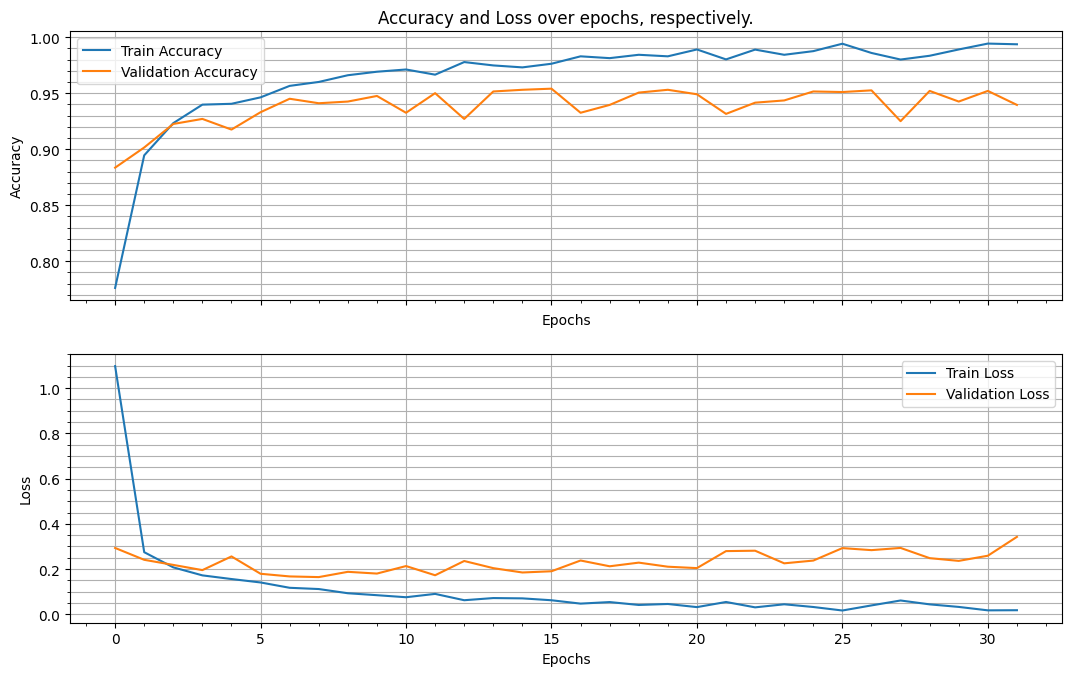

In [27]:
# Plot accuracy and loss over epochs
ax1 = plt.subplot(211)
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.minorticks_on()
ax1.tick_params('x', labelbottom=False)
ax1.grid(visible=True, which='both', axis='y')
ax1.grid(visible=True, which='Major', axis='x')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Loss over epochs, respectively.')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.minorticks_on()
ax2.grid(visible=True, which='both', axis='y')
ax2.grid(visible=True, which='Major', axis='x')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig = plt.gcf()
fig.set_size_inches(1280/fig.dpi, 768/fig.dpi)
plt.savefig("../img/CNN_CIFAR10bin_acc_n_loss_iter-" + str(iter_CNN_CIFAR10_bin) + ".png", bbox_inches='tight')

plt.show()